In [133]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [134]:
#load the data

df = load_boston()
X = pd.DataFrame(df.data)
y = pd.DataFrame(df.target)

#split the data
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=5)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [136]:
params = {
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{
            'n_jobs':[0.0,0.1,0.5]
        }
    },
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[100,200,300,400]
        }
    }
    }

In [137]:

import warnings
warnings.filterwarnings('ignore')

In [138]:
from sklearn.model_selection import GridSearchCV
scores=[]
for name,mp in params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5)
  clf.fit(X_train,y_train)
  scores.append({
      'name':name,
      'params':clf.best_params_,
      'score':clf.best_score_
  })

df_scores = pd.DataFrame(scores)
df_scores

,name,params,score
0,LinearRegression,{'n_jobs': 0.0},0.710310
1,RandomForestRegressor,{'n_estimators': 300},0.863636


In [139]:
df_res = pd.DataFrame(clf.cv_results_)
df_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.252369,0.002906,0.010010,0.002354,100,{'n_estimators': 100},0.872839,0.899459,0.856380,0.893290,0.784883,0.861370,0.041174,4
1,0.514661,0.029171,0.015471,0.001267,200,{'n_estimators': 200},0.875618,0.897258,0.858489,0.889445,0.790956,0.862353,0.038055,3
2,0.732440,0.005679,0.021351,0.000847,300,{'n_estimators': 300},0.886226,0.901811,0.853937,0.890340,0.785867,0.863636,0.042007,1
3,0.977986,0.019143,0.027586,0.000797,400,{'n_estimators': 400},0.880789,0.899941,0.856898,0.890338,0.789627,0.863519,0.039618,2


In [143]:
#create model
model = RandomForestRegressor(n_estimators=300)

#fit model
model.fit(X_train,y_train)

#predict the model
pred = model.predict(X_test)

#print mean_squared_error
print('mean_squared_error : ',mean_squared_error(y_test,pred))

mean_squared_error :  9.474496559930039


In [144]:
import statsmodels.api as sm

x = sm.add_constant(X)
result = sm.OLS(y, x).fit()
print('R-squared score : ',result.rsquared)

R-squared score :  0.7406426641094095


In [145]:
#Variable Importance for model with highest accuracy

imp_dict = { X.columns[i]:imp for i,imp in enumerate(model.feature_importances_)}
sorted_imp_dict = sorted(imp_dict.items(), key=lambda x: x[1], reverse=True)
sorted_imp_dict

[(5, 0.4176605407674716),
 (12, 0.37400288900910017),
 (7, 0.06600730517905955),
 (0, 0.06222206043448895),
 (4, 0.014970193117536015),
 (9, 0.014906102818488825),
 (6, 0.012899014698787932),
 (10, 0.012023123270987444),
 (11, 0.010929583459524522),
 (2, 0.006371875336661186),
 (8, 0.005834753003946146),
 (1, 0.0012234979585536957),
 (3, 0.0009490609453941922)]

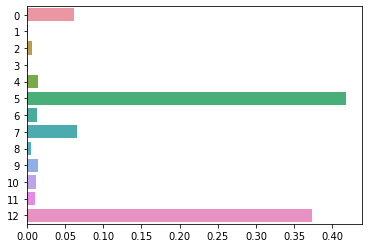

In [147]:
lst_1 = list(imp_dict.keys())
lst_2 = list(imp_dict.values())
sns.barplot(lst_2,lst_1,orient='h')